In [3]:
%config IPCompleter.greedy=True
%pylab inline    

# CNN and Transfer Learning

## Implementation of VGG-16  : From 'Scratch'

### Neural Network Initialization

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D

cnn_VGG16 = Sequential()

### First 'block'

In [15]:
# First convulation layer followied by a ReLU layer
cnn_VGG16.add(Conv2D( 64, (3,3), input_shape=(244,224,3), padding='same', activation='relu'))
# Second convulation layer
cnn_VGG16.add(Conv2D( 64, (3,3), padding='same', activation='relu'))

# First pooling layer
cnn_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

### Second 'block'

In [16]:
cnn_VGG16.add(Conv2D( 128, (3,3), padding='same', activation='relu'))
cnn_VGG16.add(Conv2D( 128, (3,3), padding='same', activation='relu'))

cnn_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

### Third 'block'

In [17]:
cnn_VGG16.add(Conv2D( 256, (3,3), padding='same', activation='relu'))
cnn_VGG16.add(Conv2D( 256, (3,3), padding='same', activation='relu'))
cnn_VGG16.add(Conv2D( 256, (3,3), padding='same', activation='relu'))


cnn_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

### Fourth 'block'

In [18]:
cnn_VGG16.add(Conv2D( 512, (3,3), padding='same', activation='relu'))
cnn_VGG16.add(Conv2D( 512, (3,3), padding='same', activation='relu'))
cnn_VGG16.add(Conv2D( 512, (3,3), padding='same', activation='relu'))

cnn_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

### Fifth 'block'  

In [19]:
cnn_VGG16.add(Conv2D( 512, (3,3), padding='same', activation='relu'))
cnn_VGG16.add(Conv2D( 512, (3,3), padding='same', activation='relu'))
cnn_VGG16.add(Conv2D( 512, (3,3), padding='same', activation='relu'))

cnn_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

### Final 'block'

In [ ]:
from keras.layers import Flatten, Dense

# Converting 3D Matrices into 1D Vector 
cnn_VGG16.add(Flatten())

# Fully connected layer, followed by a ReLU Layer
cnn_VGG16.add(Dense(4096, activation='relu'))
cnn_VGG16.add(Dense(4096, activation='relu'))

# final layer with the final classifier.
cnn_VGG16.add(Dense(1000, activation='softmax'))

### Compiling Model

In [20]:
cnn_VGG16.compile()

## Using pre-trained VGG-16

In [21]:
from keras.applications.vgg16 import VGG16

model = VGG16() # Création du modèle VGG-16 implementé par Keras

553467904/553467096 [==============================] - 13s 0us/step


### Image Preprocessing for the model

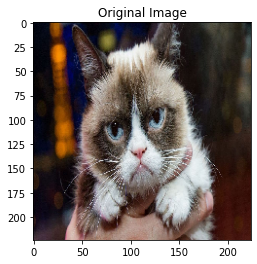

In [41]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt

img = load_img('cat.jpg', target_size=(224, 224))
plt.imshow(img)
plt.title("Original Image")

img = img_to_array(img)  # Convert to numpy array
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  # Create the image collection (a single element)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


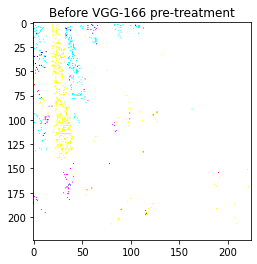

In [44]:
plt.title("Before VGG-166 pre-treatment")
plt.imshow(img[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


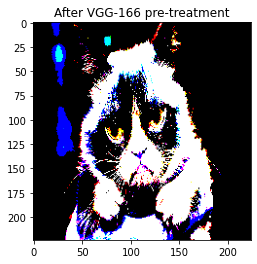

In [45]:
img = preprocess_input(img)  # VGG-16 pre-treatment
plt.title("After VGG-166 pre-treatment")
plt.imshow(img[0])

### Model Predictions

In [26]:
y = model.predict(img) # predictions with the 1000 ImageNet

In [28]:
from keras.applications.vgg16 import decode_predictions

print('Top 3 :', decode_predictions(y, top=3)[0])

Top 3 : [('n02123045', 'tabby', 0.19215085), ('n02123597', 'Siamese_cat', 0.12813514), ('n02127052', 'lynx', 0.11261541)]


## Transfer Learning

In [50]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dense
from keras import Model

# Have a pretrained model on a ImageNet and without the fully-connected layers
model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# get the output of the model
x = model.output

# add a new fully-connected  for a 10 class classification
predictions = Dense(10, activation='softmax')(x)

# define new model
new_model = Model(inputs=model.input, outputs=predictions)

### 1st Strategy : Total fine-tuning

Training each layer on each image, need to use this if the training set is very large

In [54]:
for layer in model.layers:
   layer.trainable = True

### 2nd Strategy : feature extraction
Only train the new classifier (ouput):  to use when the training dataset is small and close to the initial dataset

In [55]:
for layer in model.layers:
  layer.trainable = False

### 3rd Strategy: Partial fine-tuning

Locking some of the layers (lower layers) and training on the unlocked classes  

### Compiling Model

In [56]:
new_model.compile(loss="categorical_crossentropy", optimizer=optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

# Training on (X_train, y_train)
model_info = new_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

NameError: name 'optimizers' is not defined